# Mustafa Alhelawe
# Programming Exercise \#3
---

# Preamble

In [1]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [2]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Non-centered Data and Principal Component Analysis (PCA)**

## 1.1

In [3]:
A = np.random.randn(3,2)
c = np.random.normal(0, np.sqrt(3), 3)
print(A)
print(c)

[[-0.7157702  -1.41727618]
 [ 0.1951021   1.53116754]
 [-1.16178831  1.1067765 ]]
[1.03785823 4.19567527 0.26040242]


## 1.2

In [4]:
X = []
for i in range(250):
    b = np.array([np.random.randn(), np.random.randn()])
    x = np.matmul(A,b)
    y = x + c
    X.append(y)
X = np.vstack(X)
X.shape

(250, 3)

## 1.3

In [5]:
np.linalg.matrix_rank(X)

3

## 1.4

c can be any linear combination of the matrix A. Two examples will be shown below


In [6]:
print(A[:,1])
print(A[:,0])

[-1.41727618  1.53116754  1.1067765 ]
[-0.7157702   0.1951021  -1.16178831]


## 1.5

### (a)

In [7]:
U, S, V = np.linalg.svd(X)

u1 = V[0,:]
u2 = V[1,:]

u = [u1, u2]
u = np.vstack(u)

### (b)

In [8]:
xf = np.matmul(u, np.transpose(X))
x_hat = np.transpose(np.matmul(np.transpose(u), xf))
x_hat.shape

(250, 3)

### (c)

In [9]:
np.linalg.norm(X - x_hat)**2

413.6309954869671

## 1.6

In [10]:
mu_hat = np.mean(X, axis = 0)
X_cent = X - mu_hat

U_cent, S_cent, V_cent = np.linalg.svd(X_cent)

u1_cent = V_cent[0,:]
u2_cent = V_cent[1,:]
u_cent = [u1_cent, u2_cent]
u_cent = np.vstack(u_cent)

xf_cent = np.matmul(u_cent, np.transpose(X_cent))
x_hat_cent = np.transpose(np.matmul(np.transpose(u_cent), xf_cent))
x_hat_new = x_hat_cent + mu_hat

np.linalg.norm(X - x_hat_new)**2


8.873267699297314e-28

# **2. Preprocessing (Centering) and PCA Using `scikit learn`**

In [11]:
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp

## 2.1

In [12]:
# create an instance of the StandardScaler() object
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
# use the fit_transform API to simultaneously compute mean and center data
skl_centered_X = mean_datascaler.fit_transform(X)

## 2.2

In [13]:
print(mu_hat)
print(mean_datascaler.mean_)

[1.04474706 4.19820777 0.2847092 ]
[1.04474706 4.19820777 0.2847092 ]


## 2.3

In [14]:
np.linalg.norm(X_cent - skl_centered_X)**2

0.0

## 2.4

In [15]:
# create an instance of the PCA() object
data_pca = skldecomp.PCA(n_components=2, svd_solver='full')
# use fit_transform API to simultaneously compute PCA features & directions
skl_features = data_pca.fit_transform(skl_centered_X)

## 2.5

In [16]:
print(data_pca.components_)
print(u_cent)

[[-0.64115635  0.65744595  0.3958325 ]
 [-0.46201141  0.08116092 -0.88315251]]
[[ 0.64115635 -0.65744595 -0.3958325 ]
 [-0.46201141  0.08116092 -0.88315251]]


## 2.6

In [17]:
skl_proj = data_pca.inverse_transform(skl_features) + mean_datascaler.mean_


## 2.7

In [18]:
np.linalg.norm(x_hat_new - skl_proj)**2

7.855082463738225e-28

# **3. PCA on a Real-world Dataset**

In [19]:
from sklearn.datasets import load_digits
D, T = load_digits(n_class=1, return_X_y=True)


## 3.1

The n in this case is 178 as there are 178 different images contained in the dataset. The p would be 64 as there are 64 features that correspond to the pixel values of the image, that when reshaped, give an 8 by 8 pizel image of a 0.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

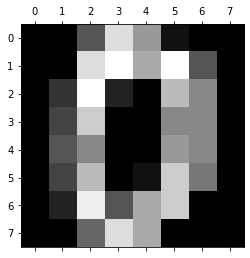

In [20]:
plt.gray()
plt.matshow(D[0].reshape(8,8))
plt.show

## 3.2

<function matplotlib.pyplot.show(close=None, block=None)>

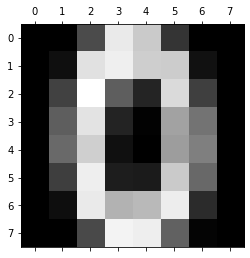

In [21]:
mean = sklpp.StandardScaler(with_mean=True, with_std=False)

D_cent = mean.fit_transform(D)
plt.matshow(mean.mean_.reshape(8,8))
plt.show

## 3.3

In [22]:
Ud, Sd, Vd = np.linalg.svd(D_cent)

## 3.4

<function matplotlib.pyplot.show(close=None, block=None)>

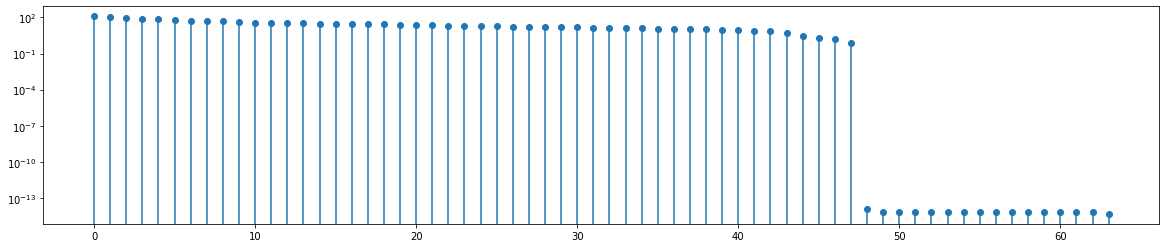

In [23]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.stem(range(len(Sd)), Sd)
plt.yscale("log") 
plt.show

## 3.5

In [24]:
for k in range(len(Sd)):
    energyc = sum([Sd[i]**2 for i in range(k)])/sum([Sd[i]**2 for i in range(len(Sd))]) * 100
    if (energyc >= 90):
        print("Number of k needed to get at least 90% energy captured: ", k)
        break

print("Energy Captured =", energyc)

Number of k needed to get at least 90% energy captured:  18
Energy Captured = 90.53591196887668


## 3.6

In [25]:
image_pca = skldecomp.PCA(n_components=0.90, svd_solver='full')
image_features = image_pca.fit_transform(D_cent)
image_pca.n_components_

18

## 3.7

<function matplotlib.pyplot.show(close=None, block=None)>

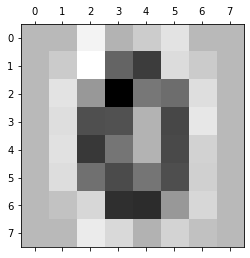

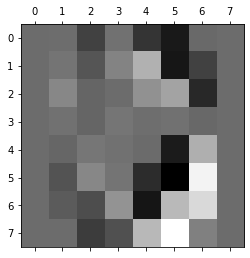

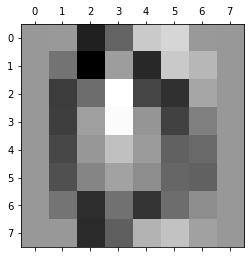

In [26]:
plt.matshow(Vd[0,:].reshape(8,8))
plt.matshow(Vd[1,:].reshape(8,8))
plt.matshow(Vd[2,:].reshape(8,8))

plt.show

## 3.8

In [27]:
D_pca = skldecomp.PCA(n_components=3, svd_solver='full')
D_f = D_pca.fit_transform(D_cent)
D_f.shape

(178, 3)

## 3.9

/Users/mustafaalhelawe/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


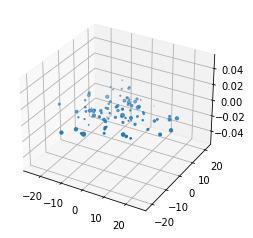

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(D_f[:,0],D_f[:,1],D_f[:,2])


## 3.10

In [29]:
D_hat = D_pca.inverse_transform(D_f) + mean.mean_
D_hat.shape

(178, 64)

## 3.11

In [30]:
print("Reconstruction Error: ", (np.linalg.norm(D - D_hat)**2)/len(D[:,0]))
print("Sum of the remaining singular values squared, which is the same as the reconstruction error", sum([Sd[i]**2 for i in range(3,64)])/len(D[:,0]))

Reconstruction Error:  202.52814947043325
Sum of the remaining singular values squared, which is the same as the reconstruction error 202.52814947043328


## 3.12

<function matplotlib.pyplot.show(close=None, block=None)>

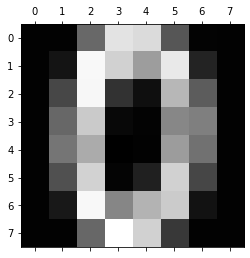

In [31]:
plt.matshow(D_hat[0].reshape(8,8))
plt.show

# **4. PCA as a Denoising Tool**

## 4.1

In [32]:
a = np.random.randn(3,1)
print(a)

[[ 0.5872485 ]
 [-0.15386017]
 [-1.78785373]]


## 4.2

In [33]:
X2 = []
Y = []
for i in range(100):
    b2 = np.random.normal(0, 2, 1)
    x2 = np.matmul(a,b2)
    n = np.random.normal(0,np.sqrt(0.05), 3)
    y2 = x2 + n
    Y.append(y2)
    X2.append(x2)
X2 = np.vstack(X2)
X2.shape

(100, 3)

## 4.3

In [34]:
Y = np.vstack(Y)
Y.shape

(100, 3)

## 4.4

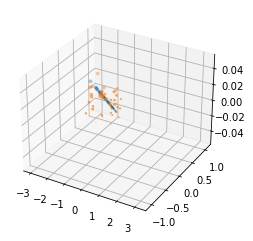

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(X2[:,0],X2[:,1],X2[:,2])
plt.scatter(Y[:,0],Y[:,1],Y[:,2])

## 4.5

In [36]:
Y_pca = skldecomp.PCA(n_components=1, svd_solver='full')
Y_f = Y_pca.fit_transform(Y)
Y_hat = Y_pca.inverse_transform(Y_f)
Y_hat.shape

(100, 3)

## 4.6

/Users/mustafaalhelawe/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


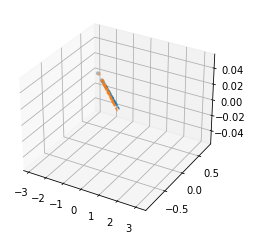

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(X2[:,0],X2[:,1],X2[:,2])
plt.scatter(Y_hat[:,0],Y_hat[:,1],Y_hat[:,2])

## 4.7

In [38]:
print("Error of original Noisy dataset: ", (np.linalg.norm(X2 - Y)**2)/100)
print("Error of projected Noisy dataset: ",(np.linalg.norm(X2 - Y_hat)**2)/100)

Error of original Noisy dataset:  0.15803064257516758
Error of projected Noisy dataset:  0.04675256293505217


## 4.8

This section of the exercise gives us more insight of real world applications of PCA. Using it as a denoising tool. This allows us to use PCA in circumstances where we know that data should be apart of a specific subspace, and allows us to 'fix' the data by projecting it on that subspace. 